In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv('AIDS_Classification_50000.csv')
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [7]:
# Kiểm tra tỷ lệ của các lớp
print(df['infected'].value_counts())

infected
0    34494
1    15506
Name: count, dtype: int64


In [18]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop('infected', axis=1)
y = df['infected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)

In [22]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

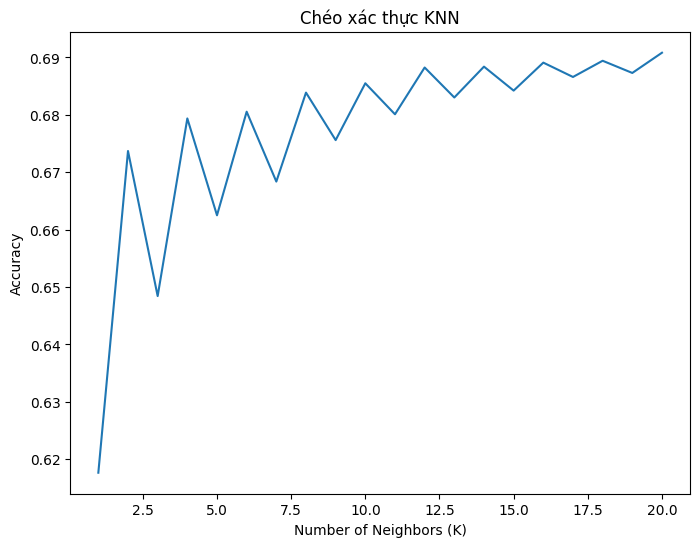

In [10]:
# Tìm số lượng neighbors tối ưu bằng chéo xác thực
k_range = range(1, 21)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 6))
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Chéo xác thực KNN')
plt.show()

In [14]:
# Huấn luyện mô hình KNN với số lượng neighbors tối ưu
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

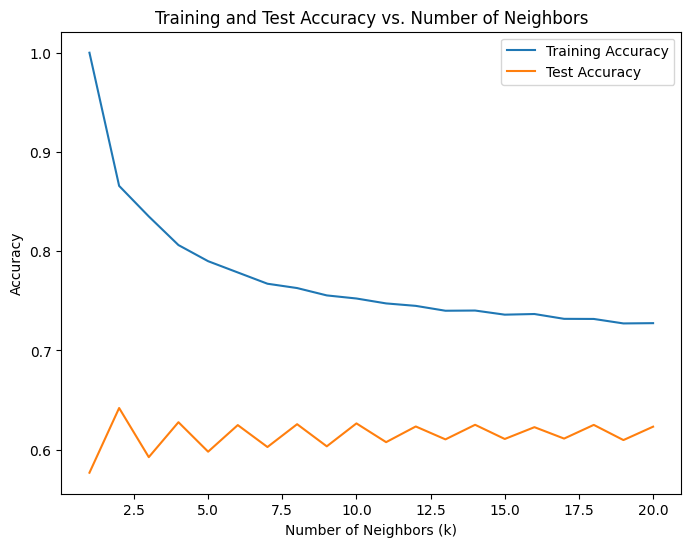

In [23]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_normalized, y_train_resampled)
    train_score = knn.score(X_train_normalized, y_train_resampled)
    test_score = knn.score(X_test_normalized, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), train_scores, label='Training Accuracy')
plt.plot(range(1, 21), test_scores, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

In [24]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy:.2f}')
print(f'Độ chính xác: {precision:.2f}')
print(f'Độ thu hồi: {recall:.2f}')

Độ chính xác: 0.61
Độ chính xác: 0.40
Độ thu hồi: 0.52


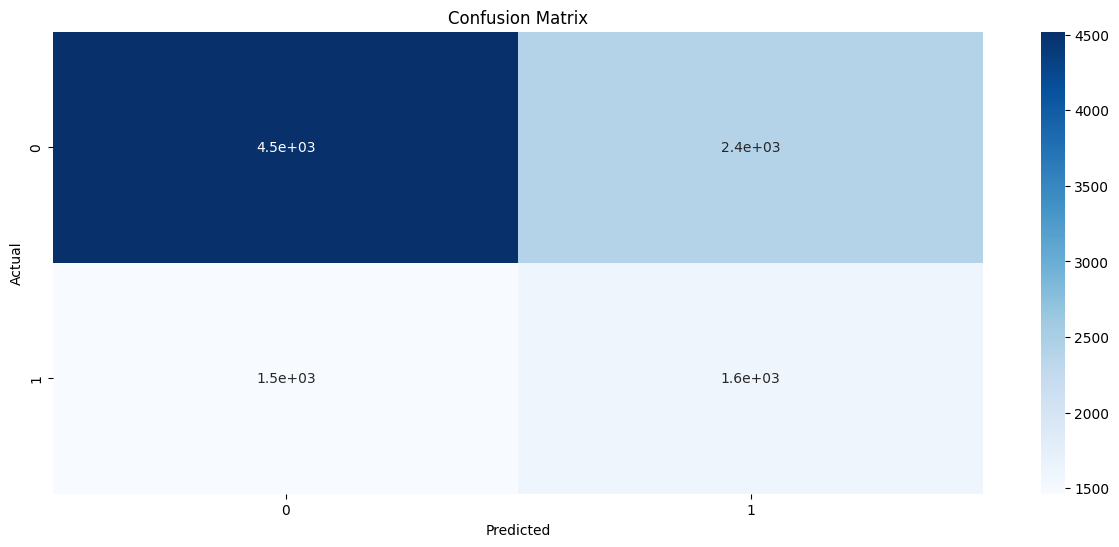

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()